<a href="https://colab.research.google.com/github/2003Yash/Agglomerative-Clustering/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

In [ ]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#The features are standardized to ensure that they have a mean of 0 and a standard deviation of 1.
#This step is important because clustering algorithms are sensitive to the scale of the input features.

In [ ]:
# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # divide into 3 clusters, affinity means distance metric, linkage describes how to link datapoints, ward is best since it  minimizes the variance within clusters.
y_pred = agg_clustering.fit_predict(X_scaled) #fits the model and returns the cluster labels for each data point.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


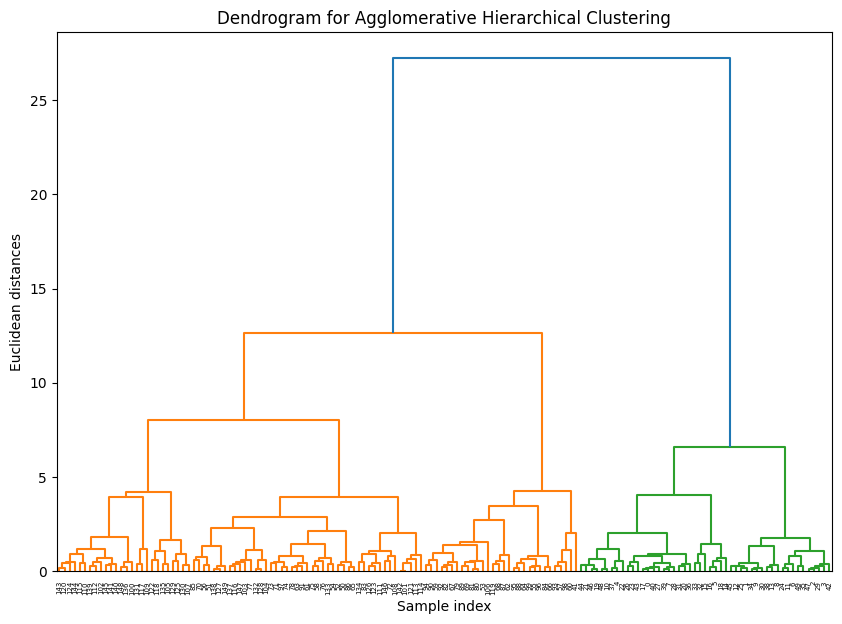

In [ ]:
# Plotting the dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distances')
plt.show()

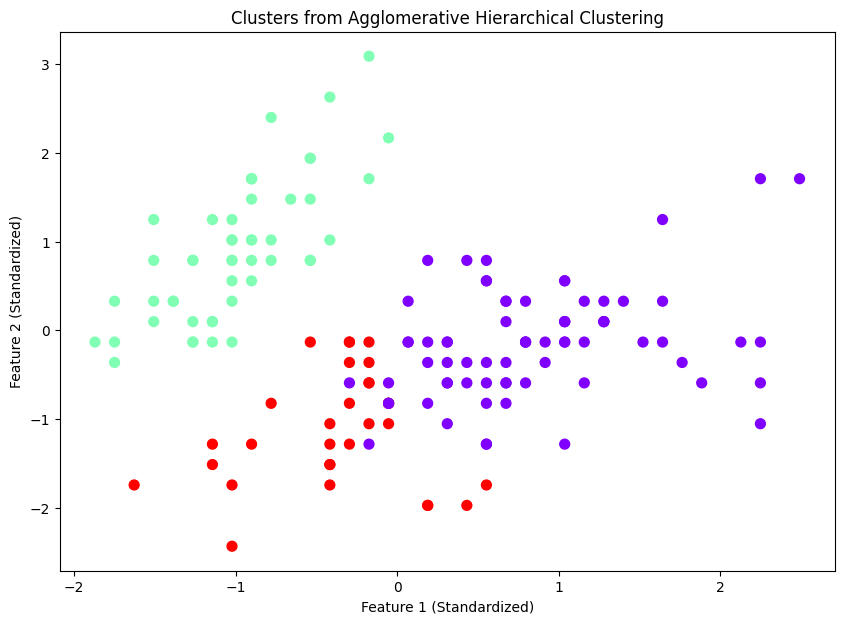

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='rainbow', s=50)
plt.title('Clusters from Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

PREDICTING WITH CLUSTER

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Calculate the centroids of the clusters
centroids = []
for label in np.unique(y_pred):
    centroids.append(X_scaled[y_pred == label].mean(axis=0))
centroids = np.array(centroids)

# Function to predict the cluster for a new data point
def predict_cluster(new_data_point, centroids):
    # Standardize the new data point
    new_data_point_scaled = scaler.transform([new_data_point])
    # Find the nearest centroid
    closest_centroid, _ = pairwise_distances_argmin_min(new_data_point_scaled, centroids) # pairwise_distances_argmin_min, which returns the index of the closest centroid.
    return closest_centroid[0]

# Example new data point (using the original feature scale)
new_data_point = [5.0, 3.5, 1.4, 0.2]
predicted_cluster = predict_cluster(new_data_point, centroids)
print(f"The new data point belongs to cluster {predicted_cluster}.")

The new data point belongs to cluster 1.


In [ ]:
# In the code provided, the Iris dataset labels were used after performing agglomerative clustering for evaluation and interpretation purposes, not for guiding the clustering process.

NUMBER OF DATAPOINTS IN A CLUSTER

In [ ]:
for label in np.unique(y_pred):
  count = np.count_nonzero(y_pred == label)
  print(f"Cluster {label}: {count} data points")

Cluster 0: 71 data points
Cluster 1: 49 data points
Cluster 2: 30 data points
